# Sentiment140 dataset with 1.6 million tweets

Bu çalışma, Sentiment140 veri kümesi ile Twitter duygu analizi yapmayı amaçlamaktadır. Tweet metinleri temizlenerek tokenleştirildi ve LSTM tabanlı bir model eğitildi. Modelin performansı doğruluk, Confusion Matrix ve Classification Report ile değerlendirildi.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

In [2]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)

In [3]:
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [4]:
df['target'] = df['target'].replace({4: 1})

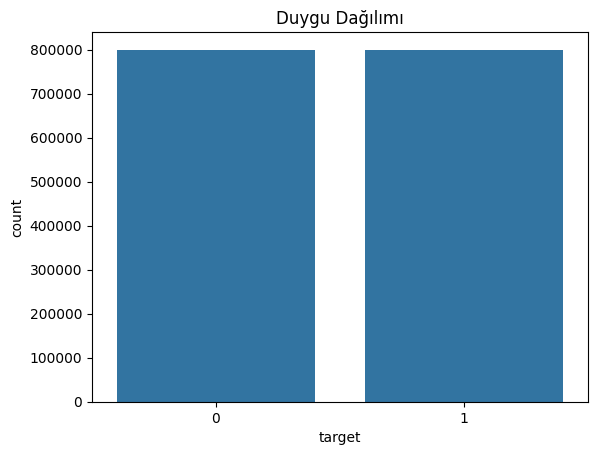

In [5]:
sns.countplot(x='target', data=df)
plt.title('Duygu Dağılımı')
plt.show()

In [6]:
X = df['text']
y = df['target']

In [7]:
# Metin temizleme fonksiyonu
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # URL'leri kaldır
    text = re.sub(r'@\w+', '', text)     # Kullanıcı adlarını kaldır
    text = re.sub(r'#', '', text)        # Hashtag'leri kaldır
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Noktalama işaretlerini kaldır
    return text

# Metinleri temizle
X = X.apply(clean_text)

In [8]:
# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)

In [16]:
# LSTM modeli
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model özeti
model.summary()

C:\Users\BETÜL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 750s 37ms/step - accuracy: 0.7911 - loss: 0.4474 - val_accuracy: 0.8215 - val_loss: 0.3929
Epoch 2/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 745s 37ms/step - accuracy: 0.8299 - loss: 0.3812 - val_accuracy: 0.8264 - val_loss: 0.3844
Epoch 3/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 753s 38ms/step - accuracy: 0.8422 - loss: 0.3577 - val_accuracy: 0.8273 - val_loss: 0.3849
Epoch 4/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 755s 38ms/step - accuracy: 0.8537 - loss: 0.3360 - val_accuracy: 0.8261 - val_loss: 0.3920
Epoch 5/5
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 762s 38ms/step - accuracy: 0.8630 - loss: 0.3165 - val_accuracy: 0.8241 - val_loss: 0.4013


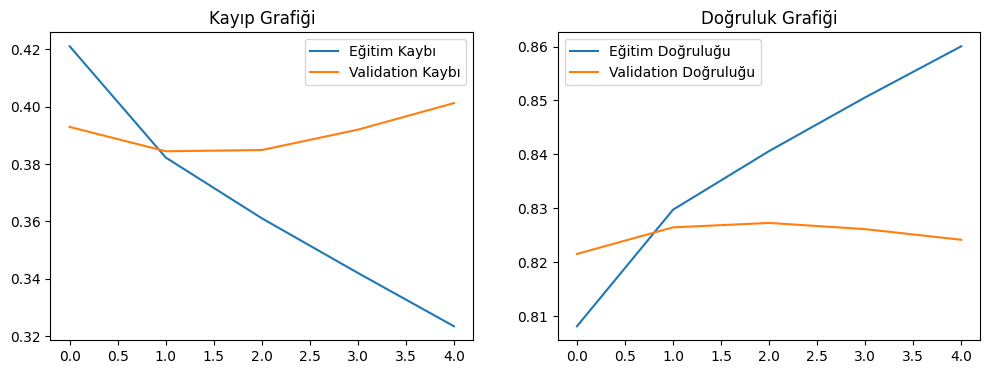

In [17]:
# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Modeli eğit
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Eğitim ve validation kaybı
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Validation Kaybı')
plt.legend()
plt.title('Kayıp Grafiği')

# Eğitim ve validation doğruluğu
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Validation Doğruluğu')
plt.legend()
plt.title('Doğruluk Grafiği')
plt.show()

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 88s 9ms/step


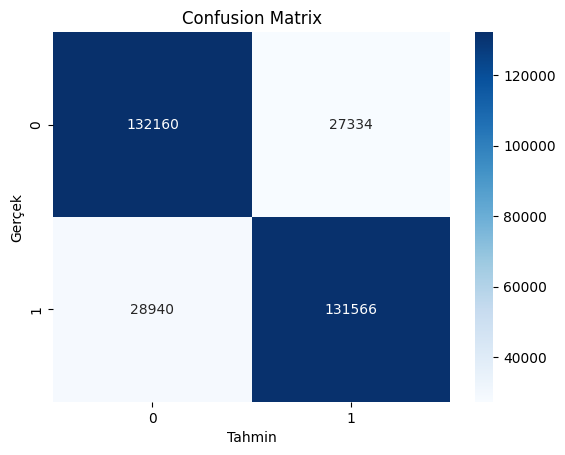

              precision    recall  f1-score   support

           0       0.82      0.83      0.82    159494
           1       0.83      0.82      0.82    160506

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



In [26]:
# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


Model, test setinde %82 doğruluk elde etti ve pozitif-negatif tweetleri dengeli şekilde sınıflandırdı. Sonuçlar başarılı olmakla birlikte, BERT gibi transformer modelleri ile performans artırılabilir.